# 1. Loading and Reading Dataset:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Hiển thị tất cả các hàng 
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_excel(r"D:\DataWarehouse and DataMining\DataMining\BaoCaoNhom\online_retail_listing.xlsx")

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
df.shape

(541909, 8)

## - Xoá dòng trùng lặp

In [7]:
df.duplicated().sum()

np.int64(5268)

In [8]:
df[df.duplicated(keep=False)].sort_values(by=['StockCode','InvoiceNo'] ).head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
139206,548309,10120,DOGGY RUBBER,1,2011-03-30 12:02:00,0.21,16657.0,United Kingdom
139262,548309,10120,DOGGY RUBBER,1,2011-03-30 12:02:00,0.21,16657.0,United Kingdom
248501,558860,10125,MINI FUNKY DESIGN TAPES,1,2011-07-04 12:18:00,0.85,17975.0,United Kingdom
248503,558860,10125,MINI FUNKY DESIGN TAPES,1,2011-07-04 12:18:00,0.85,17975.0,United Kingdom
239410,558049,10133,COLOURING PENCILS BROWN TUBE,1,2011-06-24 14:16:00,0.42,15850.0,United Kingdom
239419,558049,10133,COLOURING PENCILS BROWN TUBE,1,2011-06-24 14:16:00,0.42,15850.0,United Kingdom
308696,564049,10133,COLOURING PENCILS BROWN TUBE,10,2011-08-22 13:30:00,0.42,17585.0,United Kingdom
308705,564049,10133,COLOURING PENCILS BROWN TUBE,10,2011-08-22 13:30:00,0.42,17585.0,United Kingdom
289237,562258,10135,COLOURING PENCILS BROWN TUBE,1,2011-08-03 15:28:00,1.25,16348.0,United Kingdom
289248,562258,10135,COLOURING PENCILS BROWN TUBE,1,2011-08-03 15:28:00,1.25,16348.0,United Kingdom


In [9]:
# Removing duplicates
df = df.drop_duplicates(keep='first')  

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  535187 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      536641 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.8+ MB


## - Xử lý null

In [12]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [13]:
df_des_nulls=df[df['Description'].isnull()]
df_des_nulls.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
1988,536550,85044,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
2024,536552,20950,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
2025,536553,37461,NaN,3,2010-12-01 14:35:00,0.0,NaN,United Kingdom
2026,536554,84670,NaN,23,2010-12-01 14:35:00,0.0,NaN,United Kingdom
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom


In [14]:
df_des_nulls.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     1454
Country           0
dtype: int64

In [15]:
df_cus_nulls = df[df['CustomerID'].isnull()]
df_cus_nulls.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,2010-12-01 14:32:00,0.43,NaN,United Kingdom


In [16]:
# Loai bo gia tri null
df_not_nulls = df[df['CustomerID'].notna()]
df_not_nulls.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [17]:
df_not_nulls.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## - Chuyển đổi dữ liệu về định dạng phù hợp

In [18]:
df_not_nulls.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


In [19]:
print(df_not_nulls['CustomerID'].dtype)
print(df_not_nulls['CustomerID'].unique())

float64
[17850. 13047. 12583. ... 13298. 14569. 12713.]


In [20]:
# Chuyển đổi CustomerID từ float sang int
df_not_nulls['CustomerID'] = df_not_nulls['CustomerID'].astype(int)

C:\Users\acer\AppData\Local\Temp\ipykernel_20884\1884885336.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_nulls['CustomerID'] = df_not_nulls['CustomerID'].astype(int)


In [21]:
print(df_not_nulls['CustomerID'].dtype)
print(df_not_nulls['CustomerID'].unique())

int64
[17850 13047 12583 ... 13298 14569 12713]


## - Xoá các đơn hàng bị huỷ

In [22]:
df_not_nulls.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  int64         
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.6+ MB


In [23]:
df_not_nulls['InvoiceNo'].str.contains('C').sum()

8872

In [24]:
df_not_nulls=df_not_nulls[~df_not_nulls['InvoiceNo'].str.contains('C', na = False)]

In [25]:
df_not_nulls.nunique()

InvoiceNo      18536
StockCode       3665
Description     3877
Quantity         302
InvoiceDate    17286
UnitPrice        441
CustomerID      4339
Country           37
dtype: int64

In [26]:
df_not_nulls.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  int64         
 7   Country      392732 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.0+ MB


## - Xoá các đơn hàng có giá trị = 0

In [27]:
print("Negative value in Quantity is:",(df_not_nulls.Quantity<0).sum())
print("Negative value in Price is:",(df_not_nulls.UnitPrice<0).sum())

Negative value in Quantity is: 0
Negative value in Price is: 0


In [28]:
UnitPrice = 0.0
print(df_not_nulls[df_not_nulls['UnitPrice'] == UnitPrice ])

       InvoiceNo StockCode                          Description  Quantity  \
9302      537197     22841         ROUND CAKE TIN VINTAGE GREEN         1   
33576     539263     22580         ADVENT CALENDAR GINGHAM SACK         4   
40089     539722     22423             REGENCY CAKESTAND 3 TIER        10   
47068     540372     22090              PAPER BUNTING RETROSPOT        24   
47070     540372     22553               PLASTERS IN TIN SKULLS        24   
56674     541109     22168        ORGANISER WOOD ANTIQUE WHITE          1   
86789     543599    84535B         FAIRY CAKES NOTEBOOK A6 SIZE        16   
130188    547417     22062  CERAMIC BOWL WITH LOVE HEART DESIGN        36   
139453    548318     22055   MINI CAKE STAND  HANGING STRAWBERY         5   
145208    548871     22162          HEART GARLAND RUSTIC PADDED         2   
157042    550188     22636   CHILDS BREAKFAST SET CIRCUS PARADE         1   
187613    553000     47566                        PARTY BUNTING         4   

In [29]:
# df_not_nulls = df_not_nulls[df_not_nulls['UnitPrice'] != 0]

In [30]:
# UnitPrice = 0.0
# print(df_not_nulls[df_not_nulls['UnitPrice'] == UnitPrice ])

## - Xử lý outlier

In [31]:
#defining funcation to remove outliers w.r.t its thresholds
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return up_limit, low_limit

def replace_with_threshold(dataframe, variable):
    up_limit, low_limit = outlier_thresholds(dataframe, variable)
    # dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

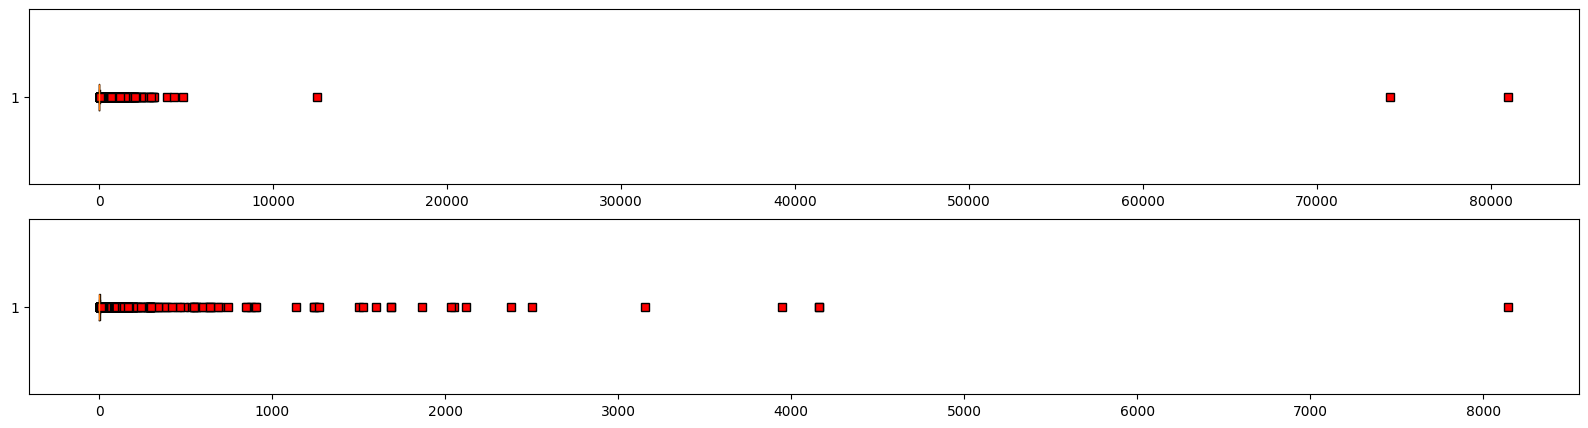

In [32]:
# Observing them before removing outliers.
f, ax = plt.subplots(2,1, figsize = (20,5))
col_list = ["Quantity","UnitPrice"]
for i in range(0,2):
    ax[i].boxplot(df_not_nulls[col_list[i]],flierprops = dict(marker = "s", markerfacecolor = "red"), vert = 0)
plt.show()

In [33]:
# Applying the functions for remove the outlier.
replace_with_threshold(df_not_nulls, "Quantity")
replace_with_threshold(df_not_nulls, "UnitPrice")

C:\Users\acer\AppData\Local\Temp\ipykernel_20884\2133905600.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '298.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


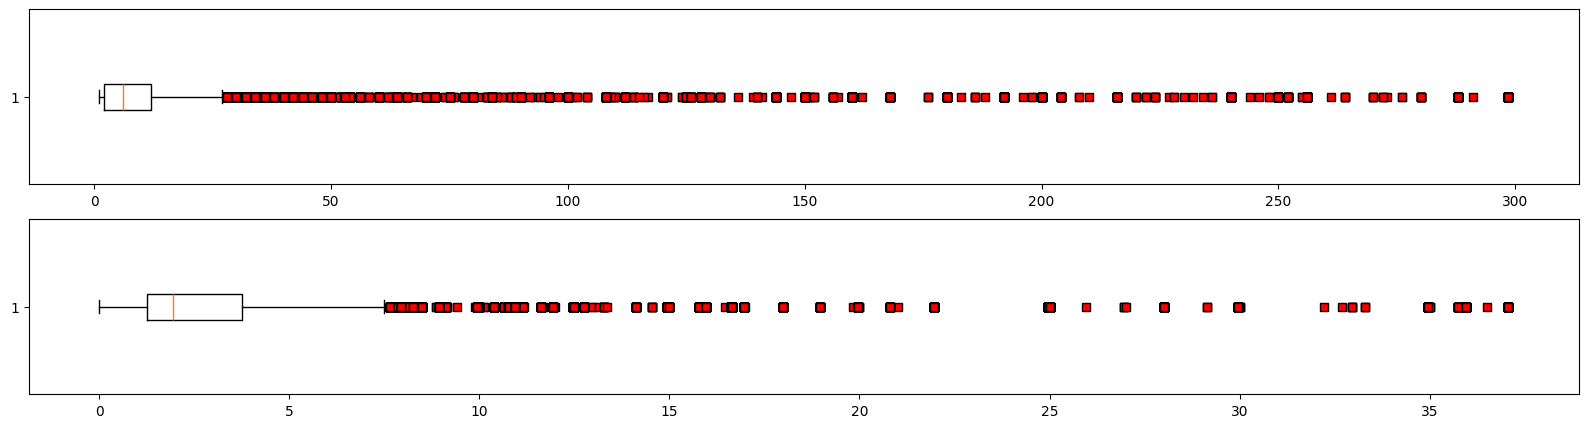

In [34]:
# Observing them after removing outliers.
f, ax = plt.subplots(2,1, figsize = (20,5))
for i in range(0,2):
    ax[i].boxplot(df_not_nulls[col_list[i]],flierprops = dict(marker = "s", markerfacecolor = "red"), vert = 0)
plt.show()

# 2. Tính R,F,M

In [35]:
import pandas as pd
import datetime

# 1. Calculate Recency (R)
# Get the maximum transaction date and add one day
current_date = max(df_not_nulls['InvoiceDate']) + datetime.timedelta(days=1)

# 2. Calculate Total_Price
df_not_nulls['TotalPay'] = df_not_nulls['Quantity'] * df_not_nulls['UnitPrice']



# 3. Group by CustomerID to calculate R, F, M
rfm_df = df_not_nulls.groupby(['CustomerID']).agg(
    Recency=('InvoiceDate', lambda x: (current_date - x.max()).days),  # Recency
    Frequency=('InvoiceNo', lambda x: x.nunique()),  # Frequency
    Monetary=('TotalPay', lambda x: x.sum())  # Monetary
).reset_index()

# Display the RFM DataFrame
print(rfm_df.head())

   CustomerID  Recency  Frequency  Monetary
0       12346      326          1    310.44
1       12347        2          7   4310.00
2       12348       75          4   1770.78
3       12349       19          1   1491.72
4       12350      310          1    331.46


In [36]:
current_date

Timestamp('2011-12-10 12:50:00')

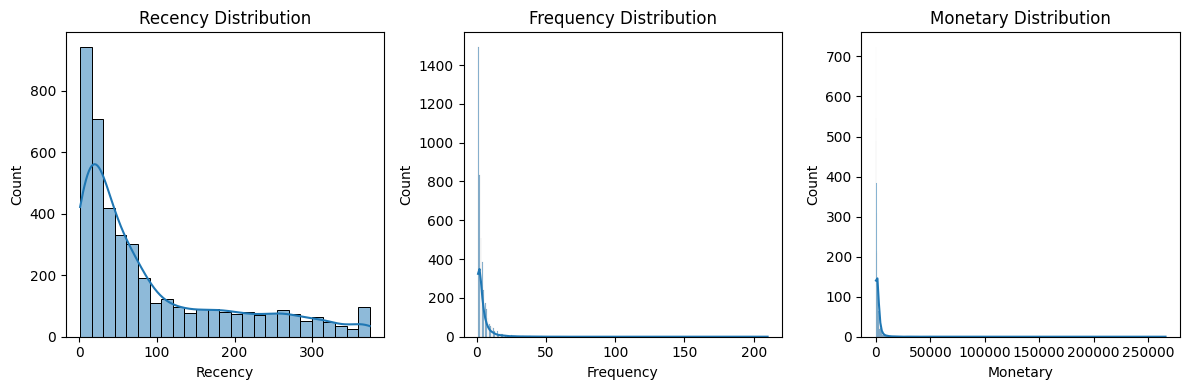

In [37]:
# Ve phan phoi de kiem tra
# Tạo đồ thị
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

# Sử dụng sns.histplot để thay thế sns.distplot
sns.histplot(rfm_df['Recency'], kde=True, ax=ax[0])
ax[0].set_title('Recency Distribution')

sns.histplot(rfm_df['Frequency'], kde=True, ax=ax[1])
ax[1].set_title('Frequency Distribution')

sns.histplot(rfm_df['Monetary'], kde=True, ax=ax[2])
ax[2].set_title('Monetary Distribution')

plt.tight_layout()
plt.show()

## - Xử lý outlier

In [38]:
# import matplotlib.pyplot as plt

# def plot_boxplot(df, ft):
#     plt.figure(figsize=(12, 6))

#     # Vẽ boxplot nằm ngang
#     plt.subplot(1, 2, 1)
#     df.boxplot(column=[ft], vert=False)
#     plt.title(f'Boxplot of {ft}')
#     plt.grid(False)

#     # Vẽ histogram
#     plt.subplot(1, 2, 2)
#     df[ft].hist(bins=30, edgecolor='black')
#     plt.title(f'Histogram of {ft}')
#     plt.xlabel(ft)
#     plt.ylabel('Frequency')

#     plt.tight_layout()
#     plt.show()

In [39]:
# plot_boxplot(rfm_df, 'Recency')

In [40]:
# plot_boxplot(rfm_df, 'Frequency')

In [41]:
# plot_boxplot(rfm_df, 'Monetary')

In [42]:
# from typing import Tuple
# from sklearn.base import BaseEstimator, TransformerMixin


# def find_boxplot_boundaries(
#     col: pd.Series, whisker_coeff: float = 1.5
# ) -> Tuple[float, float]:
#     """Findx minimum and maximum in boxplot.

#     Args:
#         col: a pandas serires of input.
#         whisker_coeff: whisker coefficient in box plot
#     """
#     Q1 = col.quantile(0.25)
#     Q3 = col.quantile(0.75)
#     IQR = Q3 - Q1
#     lower = Q1 - whisker_coeff * IQR
#     upper = Q3 + whisker_coeff * IQR
#     return lower, upper


# class BoxplotOutlierClipper(BaseEstimator, TransformerMixin):
#     def __init__(self, whisker_coeff: float = 1.5):
#         self.whisker = whisker_coeff
#         self.lower = None
#         self.upper = None

#     def fit(self, X: pd.Series):
#         self.lower, self.upper = find_boxplot_boundaries(X, self.whisker)
#         return self

#     def transform(self, X):
#         return X.clip(self.lower, self.upper)

In [43]:
# # Áp dụng clipping outliers trực tiếp vào cột "Frequency" trong rfm_df
# rfm_df["Frequency"] = BoxplotOutlierClipper().fit_transform(rfm_df["Frequency"])

# # Vẽ histogram và boxplot cho cột "Frequency" sau khi xử lý
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
# rfm_df["Frequency"].hist(bins=50, ax=axes[0])
# rfm_df[["Frequency"]].boxplot(ax=axes[1], vert=False)
# plt.show() 

In [44]:
# # Áp dụng clipping outliers trực tiếp vào cột "Monetary" trong rfm_df
# rfm_df["Monetary"] = BoxplotOutlierClipper().fit_transform(rfm_df["Monetary"])

# # Vẽ histogram và boxplot cho cột "Monetary" sau khi xử lý
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
# rfm_df["Monetary"].hist(bins=50, ax=axes[0])
# rfm_df[["Monetary"]].boxplot(ax=axes[1], vert=False)
# plt.show() 

In [45]:
# # Vẽ biểu đồ phân phối
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Giả sử rfm_df là DataFrame của bạn

# fig, ax = plt.subplots(1, 3, figsize=(12, 4))

# sns.histplot(rfm_df['Recency'], ax=ax[0])
# sns.histplot(rfm_df['Frequency'], ax=ax[1])
# sns.histplot(rfm_df['Monetary'], ax=ax[2])

# plt.show()

## - Chuyển về phân phối chuẩn

In [46]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_skewness(data, column):
    # Thiết lập biểu đồ 2x2
    fig, ax = plt.subplots(2, 2, figsize=(10, 8))
    
    # Phân phối gốc
    sns.histplot(data[column], kde=True, ax=ax[0, 0])
    ax[0, 0].set_title('Original Distribution')
    
    # Phân phối sau khi log transformation
    sns.histplot(np.log(data[column] + 1), kde=True, ax=ax[0, 1])
    ax[0, 1].set_title('Log Transformation')
    
    # Phân phối sau khi square root transformation
    sns.histplot(np.sqrt(data[column]), kde=True, ax=ax[1, 0])
    ax[1, 0].set_title('Square Root Transformation')
    
    # Phân phối sau khi box-cox transformation
    transformed_data, _ = stats.boxcox(data[column][data[column] > 0])  # Chỉ áp dụng Box-Cox cho các giá trị dương
    sns.histplot(transformed_data, kde=True, ax=ax[1, 1])
    ax[1, 1].set_title('Box-Cox Transformation')
    ax[1, 1].set_xlabel(column)  # Đặt lại tên trục x

    
    plt.tight_layout()
    plt.show()
    
    # Tính độ lệch skewness cho từng phép biến đổi
    print(f"Original Skewness: {data[column].skew().round(2)}")
    print(f"Log Transformation Skewness: {np.log(data[column] + 1).skew().round(2)}")
    print(f"Square Root Transformation Skewness: {np.sqrt(data[column]).skew().round(2)}")
    print(f"Box-Cox Transformation Skewness: {pd.Series(transformed_data).skew().round(2)}")

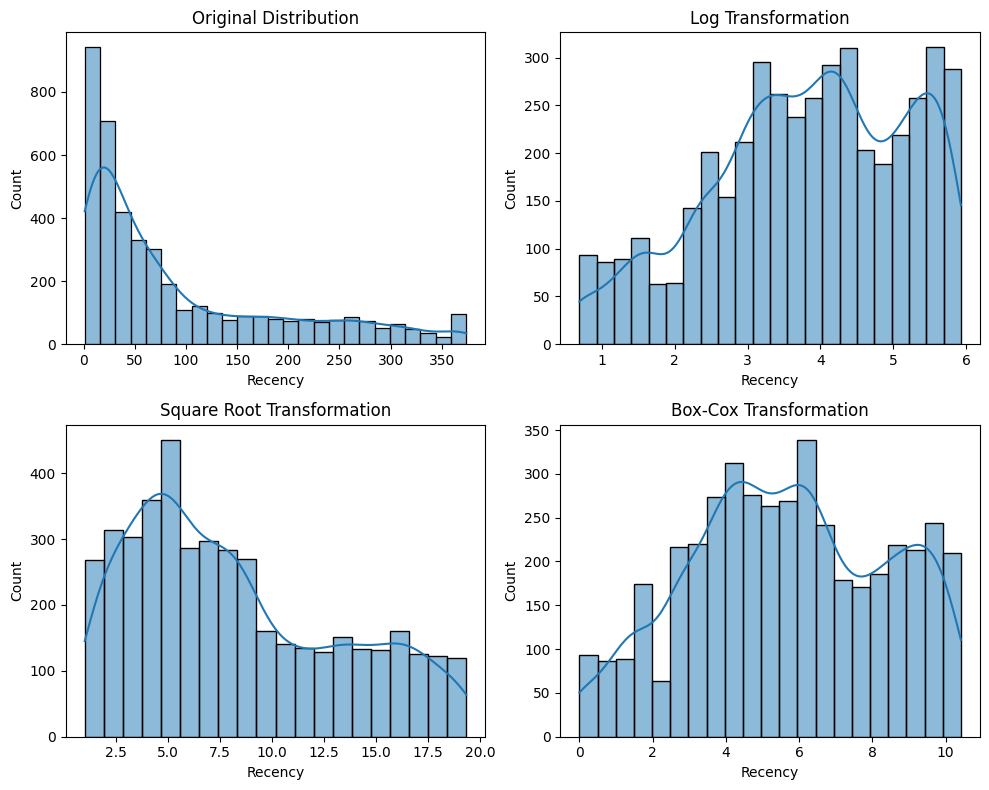

Original Skewness: 1.25
Log Transformation Skewness: -0.38
Square Root Transformation Skewness: 0.59
Box-Cox Transformation Skewness: -0.07


In [47]:
analyze_skewness(rfm_df, 'Recency')

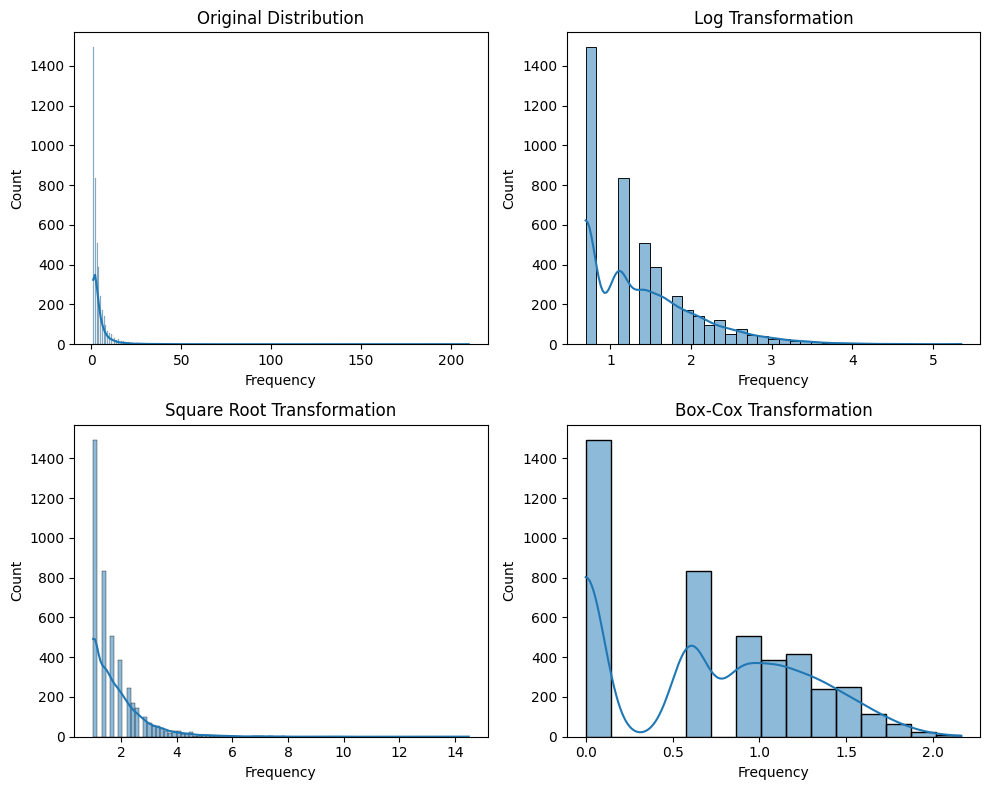

Original Skewness: 12.1
Log Transformation Skewness: 1.21
Square Root Transformation Skewness: 3.03
Box-Cox Transformation Skewness: 0.14


In [48]:
analyze_skewness(rfm_df, 'Frequency')

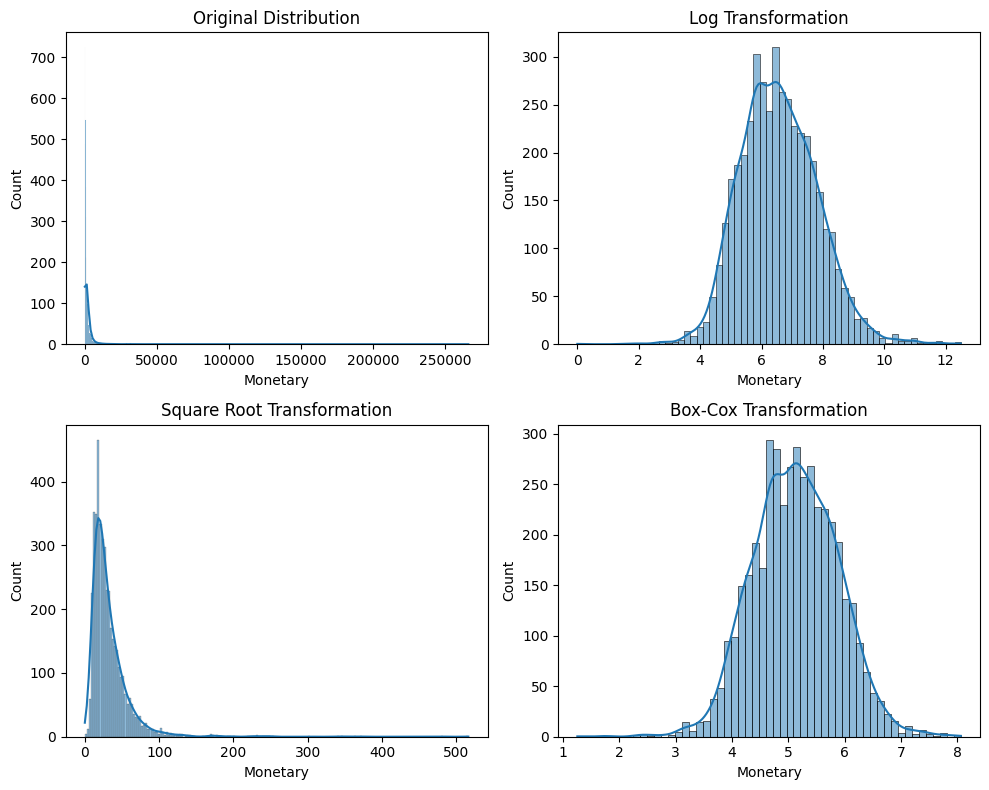

Original Skewness: 20.88
Log Transformation Skewness: 0.31
Square Root Transformation Skewness: 5.54
Box-Cox Transformation Skewness: -0.01


In [49]:
analyze_skewness(rfm_df, 'Monetary')

In [50]:
# Tiến hành transform dữ liệu
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,310.44
1,12347,2,7,4310.00
2,12348,75,4,1770.78
3,12349,19,1,1491.72
4,12350,310,1,331.46


In [51]:
print(rfm_df[rfm_df['Monetary'] <= 0])

     CustomerID  Recency  Frequency  Monetary
685       13256       14          1       0.0


In [52]:
rfm_df = rfm_df[rfm_df['Monetary'] > 0]

In [53]:
rfm_df_t = pd.DataFrame()
rfm_df_t['Recency'] = stats.boxcox(np.sqrt(rfm_df['Recency']))[0]
rfm_df_t['Frequency'] = stats.boxcox(rfm_df['Frequency'])[0]
rfm_df_t['Monetary'] = stats.boxcox(rfm_df['Monetary'])[0]

In [54]:
rfm_df_t.head()

,Recency,Frequency,Monetary
0,5.019545,0.000000,4.649255
1,0.368553,1.339169,6.189823
2,3.230181,1.056554,5.703025
3,1.927980,0.000000,5.605327
4,4.950320,0.000000,4.691485


## - K-Means

In [85]:
# Tiến hành scale dữ liệu
from sklearn.preprocessing import StandardScaler

# Tạo một đối tượng StandardScaler
scaler = StandardScaler()

# Fit và transform dữ liệu
rfm_df_t = scaler.fit_transform(rfm_df_t)

# Để xem dữ liệu đã transform dưới dạng DataFrame
pd.DataFrame(rfm_df_t).head()

,0,1,2
0,1.624870,-1.184670,-0.637239
1,-1.841636,1.159262,1.407690
2,0.291210,0.664605,0.761522
3,-0.679354,-1.184670,0.631838
4,1.573275,-1.184670,-0.581183


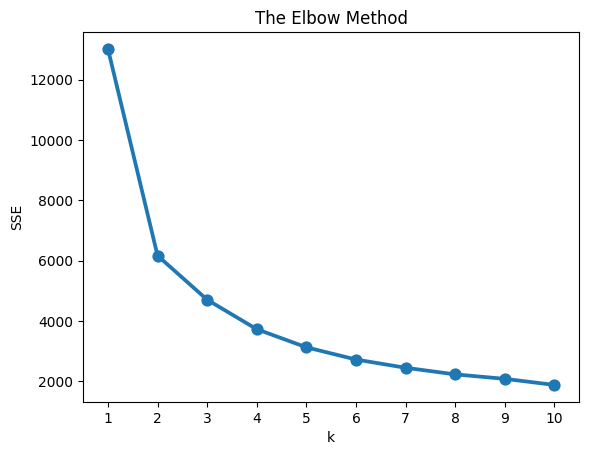

In [86]:
# Đưa dữ liệu vào K means
# Chon so cum bang Elbow
from sklearn.cluster import KMeans

# Khởi tạo dictionary để lưu kết quả
sse = {}

# Thử nghiệm với số cụm từ 1 đến 11
for k in range(1, 11):
    # Khởi tạo mô hình KMeans với k cụm
    kmeans = KMeans(n_clusters=k, random_state=42)
    # Fit mô hình với dữ liệu đã chuẩn hóa
    kmeans.fit(rfm_df_t)
    # Lưu giá trị inertia (SSE) cho số cụm k
    sse[k] = kmeans.inertia_

# Vẽ đồ thị Elbow
plt.title('The Elbow Method')
plt.xlabel('k')  # Số cụm
plt.ylabel('SSE')  # Sum of Squared Errors
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

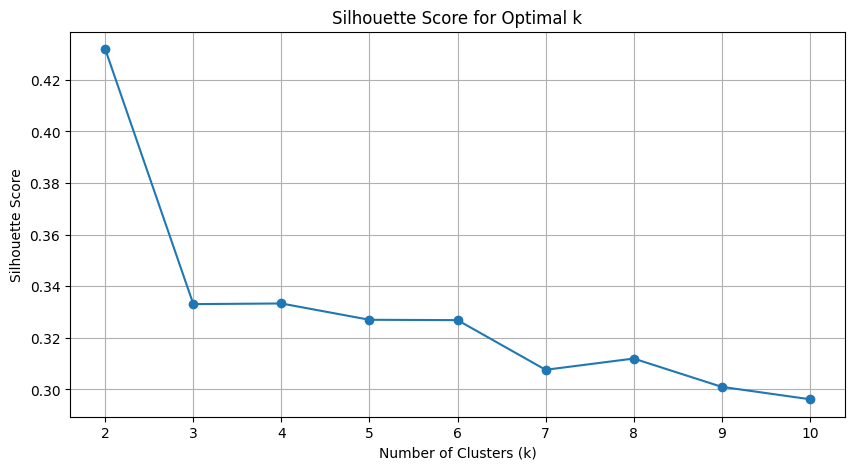

In [87]:
from sklearn.metrics import silhouette_score
range_k = range(2, 11)  # Kiểm tra từ 2 đến 10 cụm
silhouette_scores = []
for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(rfm_df_t)
    silhouette_avg = silhouette_score(rfm_df_t, cluster_labels)
    silhouette_scores.append(silhouette_avg)
plt.figure(figsize=(10, 5))
plt.plot(range_k, silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range_k)
plt.grid()
plt.show()

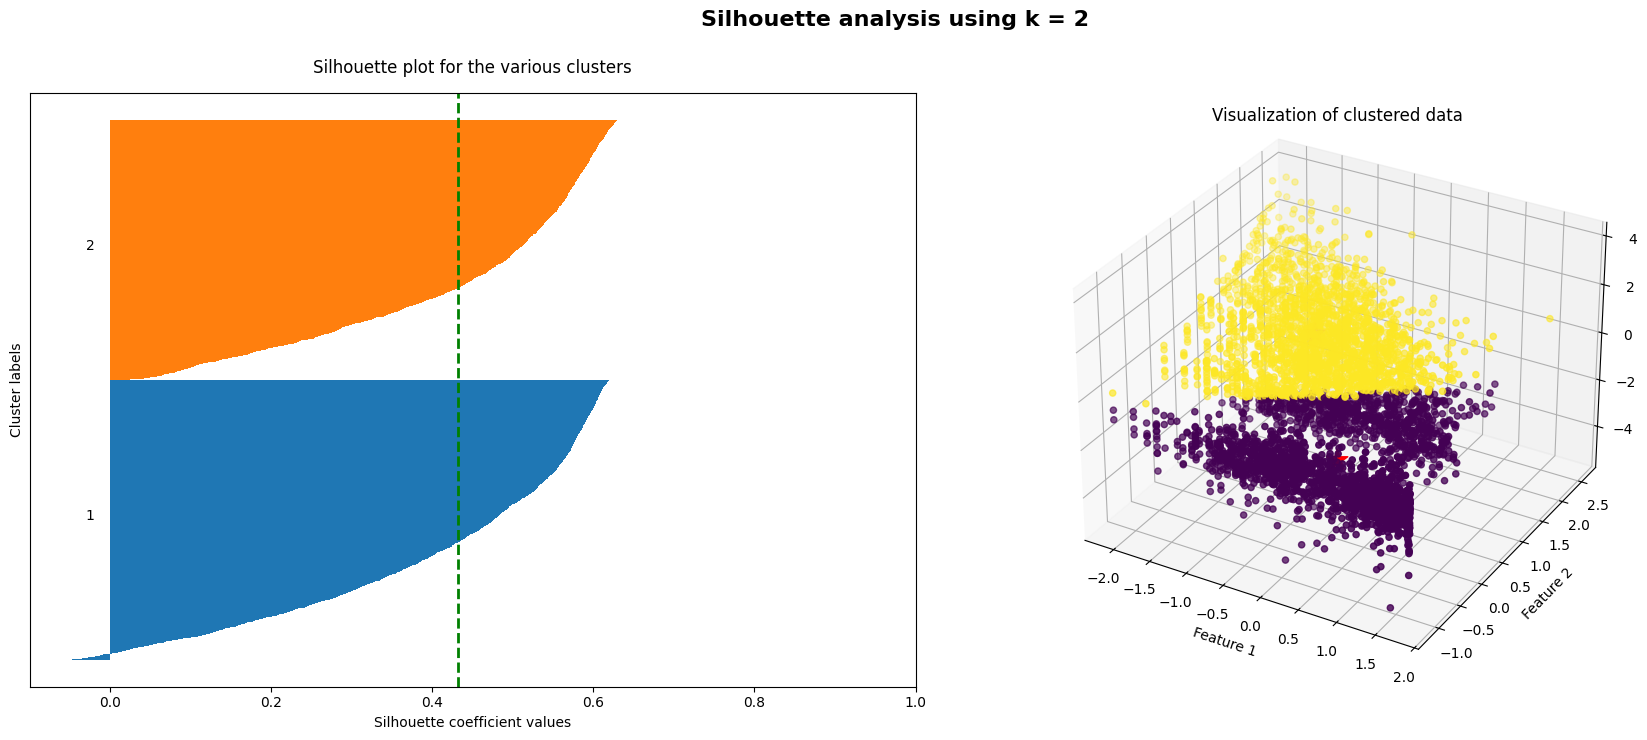

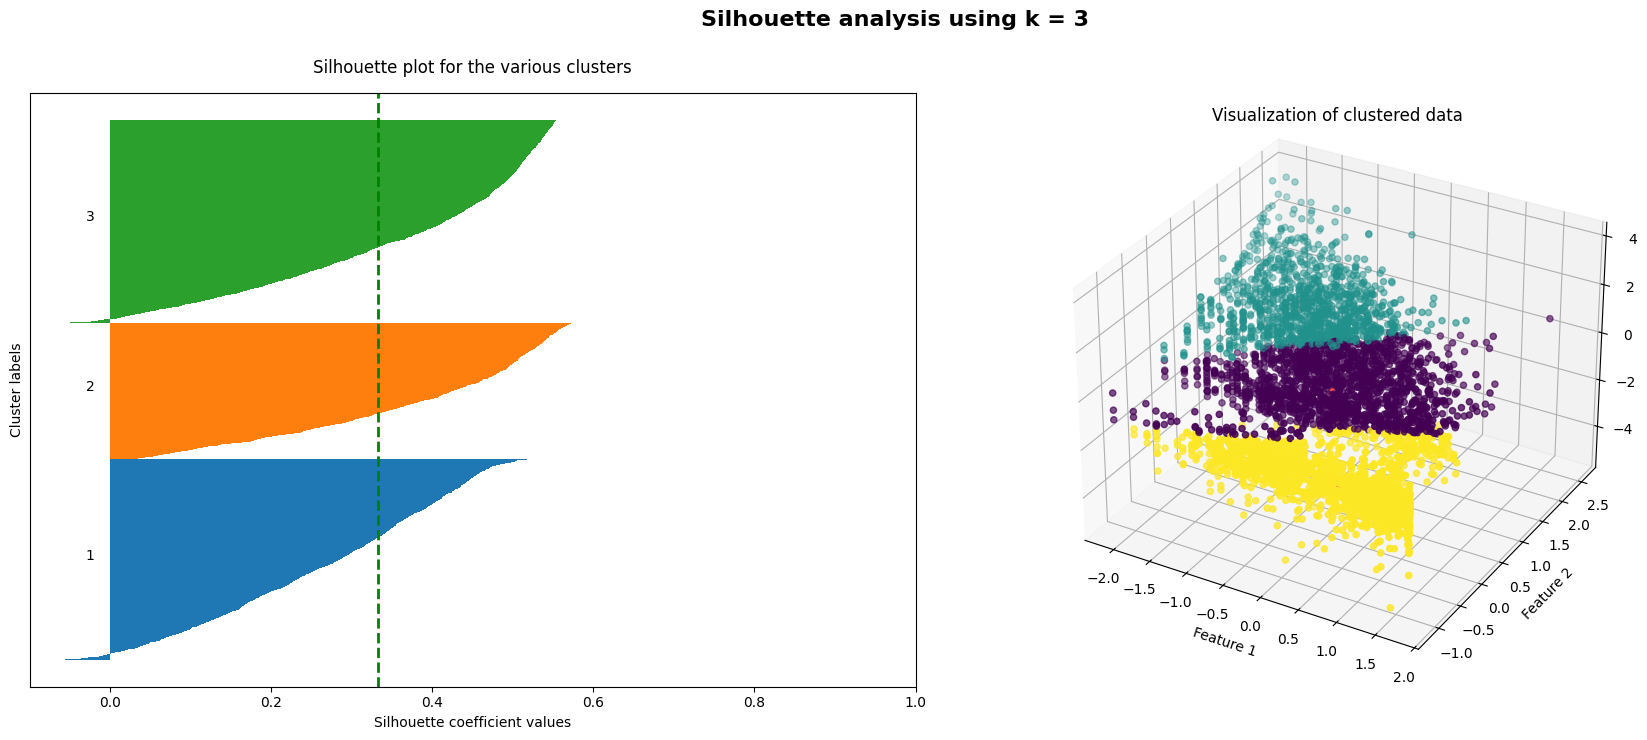

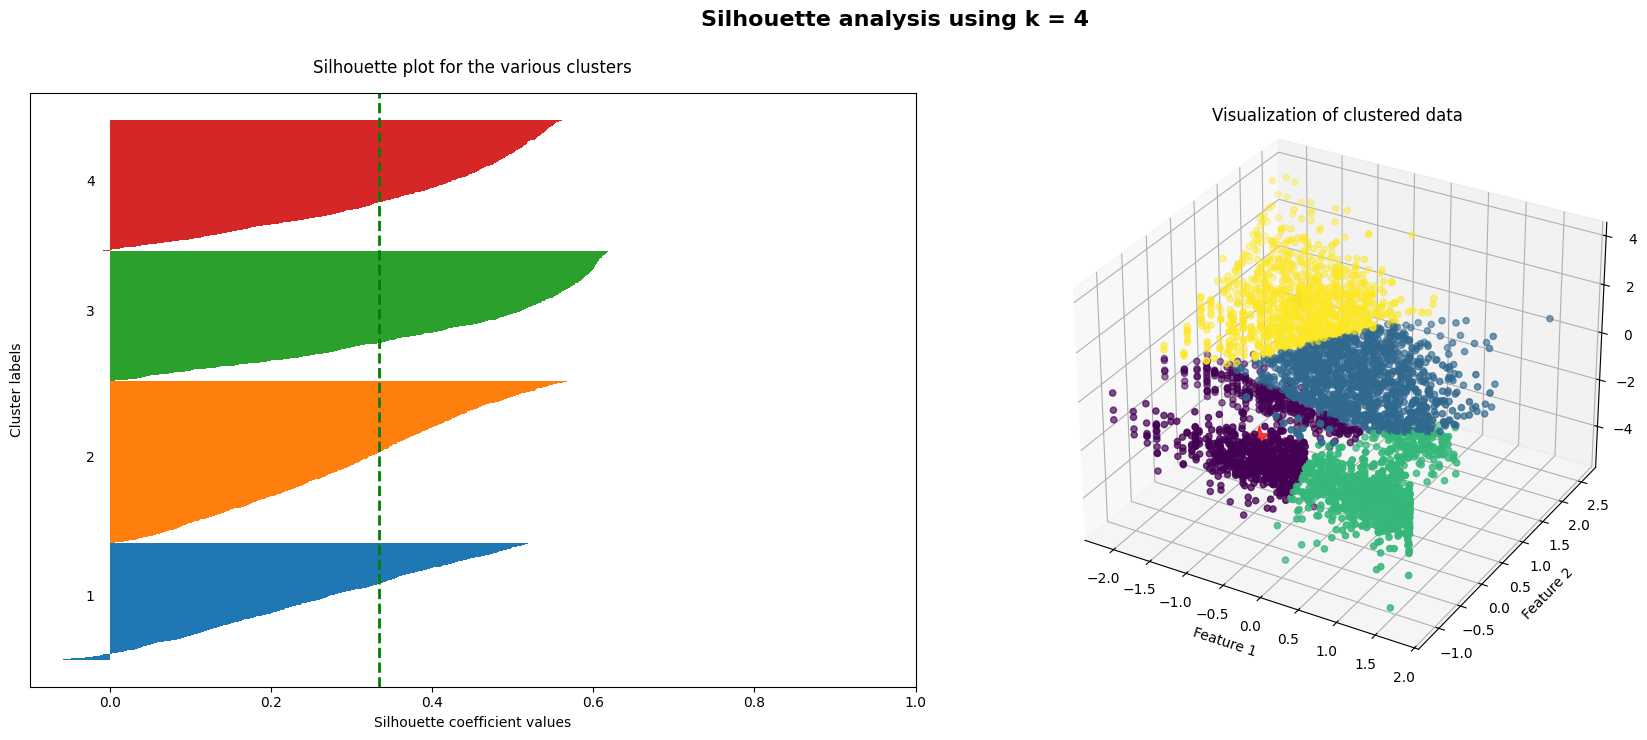

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

# Giả sử bạn đã chuẩn hóa dữ liệu và biến rfm_df_t có kích thước (n_samples, 3)
for i, k in enumerate([2,3,4]):
    fig = plt.figure(figsize=(18, 7))
    
    # Run the KMeans algorithm
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(rfm_df_t)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(rfm_df_t, labels)

    # Silhouette plot
    ax1 = fig.add_subplot(121)
    y_ticks = []
    y_lower, y_upper = 0, 0
    for cluster in np.unique(labels):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(cluster + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02)

    # Scatter plot of data colored with labels in 3D
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(rfm_df_t[:, 0], rfm_df_t[:, 1], rfm_df_t[:, 2], c=labels, cmap='viridis')
    ax2.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='*', c='r', s=250)
    ax2.set_xlabel('Feature 1')  # Cập nhật nhãn nếu cần
    ax2.set_ylabel('Feature 2')  # Cập nhật nhãn nếu cần
    ax2.set_zlabel('Feature 3')  # Cập nhật nhãn nếu cần
    ax2.set_title('Visualization of clustered data', y=1.02)
    
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05)
    plt.show()

In [95]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(rfm_df_t)

KMeans(n_clusters=3, random_state=42)

In [96]:
# Gán nhãn cluster vào dataframe
rfm_df['Cluster'] = model.labels_ 

# Kiểm tra kích thước
print(len(rfm_df), len(model.labels_))

4338 4338


In [97]:
rfm_df.groupby('Cluster').agg(
    {
        'Recency':'mean',
        'Frequency': 'mean',
        'Monetary': 'mean'
    }
)

,Recency,Frequency,Monetary
Cluster,,,
0,0.187391,0.009789,0.003711
1,0.041182,0.046498,0.020795
2,0.440768,0.000626,0.001130


In [98]:
rfm_df.head(10)

,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346,0.871314,0.000000,0.001152,2
1,12347,0.002681,0.028708,0.016179,1
2,12348,0.198391,0.014354,0.006639,0
3,12349,0.048257,0.000000,0.005591,0
4,12350,0.828418,0.000000,0.001231,2
5,12352,0.093834,0.033493,0.006585,1
6,12353,0.544236,0.000000,0.000320,2
7,12354,0.619303,0.000000,0.004041,2
8,12355,0.571046,0.000000,0.001712,2
9,12356,0.058981,0.009569,0.010549,1


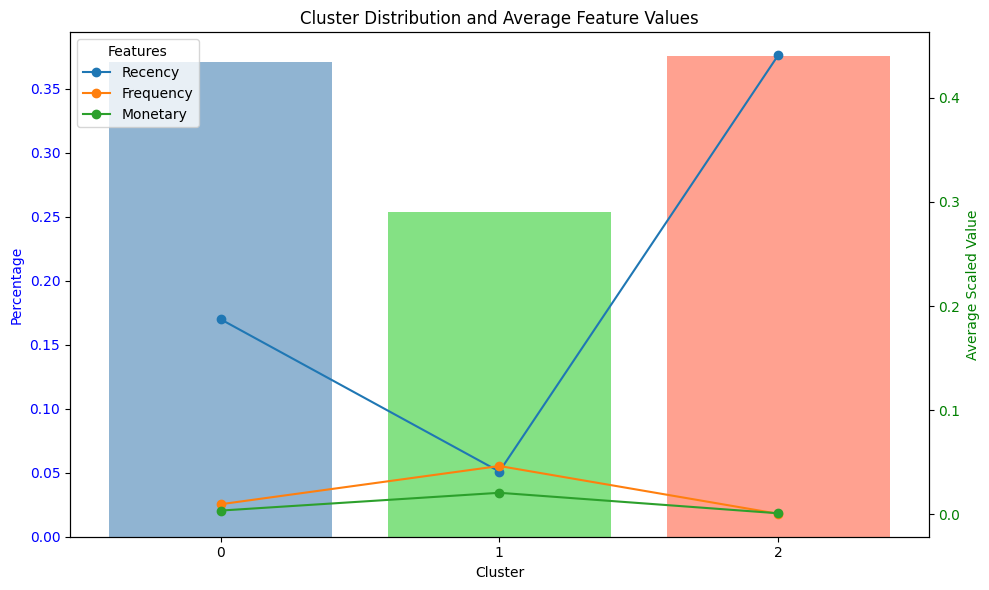

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Chọn các thuộc tính bạn muốn tính giá trị trung bình
features = ['Recency', 'Frequency', 'Monetary']

# Chuẩn hóa các thuộc tính
scaler = MinMaxScaler()
rfm_df[features] = scaler.fit_transform(rfm_df[features])
# Tính tỷ lệ phần trăm số lượng mẫu trong từng cụm
cluster_counts = rfm_df['Cluster'].value_counts(normalize=True)

# Tính giá trị trung bình của các thuộc tính theo từng cụm
mean_values = rfm_df.groupby('Cluster')[features].mean()

# Tạo biểu đồ
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart: phân phối các cụm
colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700']  # Màu sắc cho từng cụm
ax1.bar(cluster_counts.index, cluster_counts.values, color=colors, alpha=0.6, label='Cluster Distribution')
# Đặt tiêu đề và nhãn cho trục x, y
ax1.set_title('Cluster Distribution and Average Feature Values')
ax1.set_xlabel('Cluster')
ax1.set_ylabel('Percentage', color='blue')
ax1.set_xticks(cluster_counts.index)  # Đảm bảo các nhãn trên trục X đúng
ax1.set_xticklabels(cluster_counts.index, rotation=0)
ax1.tick_params(axis='y', labelcolor='blue')
# Tạo trục y thứ hai để vẽ line chart
ax2 = ax1.twinx()
for feature in features:
    ax2.plot(mean_values.index, mean_values[feature], marker='o', label=feature)
# Đặt nhãn và màu sắc cho trục y thứ hai
ax2.set_ylabel('Average Scaled Value', color='green')
ax2.tick_params(axis='y', labelcolor='green')
# Thêm legend
ax2.legend(title='Features', loc='upper left')
# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

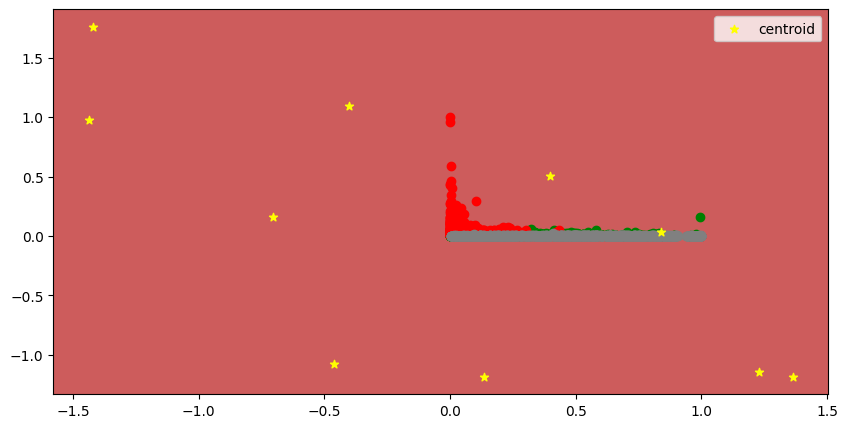

In [100]:
# grouping the data in accorandance with each cluster seperately
one = rfm_df[rfm_df["Cluster"]==0]
two = rfm_df[rfm_df["Cluster"]==1]
three = rfm_df[rfm_df["Cluster"]==2]
four = rfm_df[rfm_df["Cluster"]==3]

#Checking the quality of clustering in the data set
plt.figure(figsize=(10,5))
ax = plt.axes()
ax.set_facecolor("#cd5c5c")
plt.scatter(one["Recency"],one["Frequency"],color='green')
plt.scatter(two["Recency"],two["Frequency"],color='red')
plt.scatter(three["Recency"],three["Frequency"],color='grey')
plt.scatter(four["Recency"],four["Frequency"],color='blue')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color="yellow",marker="*",label="centroid")
plt.legend()
plt.show 

In [101]:
from sklearn.metrics import silhouette_score
print("Silhouette score :",silhouette_score(rfm_df, kmeans.labels_, metric='euclidean'))

Silhouette score : -0.058536617931516016


## - Hirarchical

In [97]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import fcluster

In [98]:
columns = ['Recency', 'Frequency', 'Monetary']
df_HR = rfm_df[columns]

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_HR)
scaled_df_HR = pd.DataFrame(data_scaled, columns=df_HR.columns)
print(scaled_df_HR.head())

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Tính toán các liên kết phân cấp
Z = linkage(rfm_df_t, method='ward')

# Vẽ dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

In [ ]:
model = AgglomerativeClustering(n_clusters=2, linkage='ward')
rfm_df['Cluster_Hierarchical'] = model.fit_predict(rfm_df_t)
print("Kết quả phân cụm:\n", rfm_df[['Cluster_Hierarchical']].value_counts())

In [ ]:
print(rfm_df.head())  # Kiểm tra các dòng đầu tiên trong DataFrame để đảm bảo dữ liệu đúng
print(rfm_df.shape)  # Kiểm tra số lượng cột và dòng trong DataFrame


In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Kiểm tra các cột bạn muốn vẽ
sc = ax.scatter(
    rfm_df.iloc[:, 0], rfm_df.iloc[:, 1], rfm_df.iloc[:, 2],  # Các cột cho trục X, Y, Z
    c=rfm_df['Cluster_Hierarchical'], cmap='viridis', s=50  # Dùng cột phân cụm làm màu
)

# Cài đặt tiêu đề và nhãn cho các trục
ax.set_title('Hierarchical Clustering Results (PCA Reduced 3D)', fontsize=16)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Hiển thị đồ thị
plt.show()


In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(
    rfm_df.iloc[:, 0], rfm_df.iloc[:, 1], rfm_df.iloc[:, 2], 
    c=rfm_df['Cluster_Hierarchical'], cmap='viridis', s=50
)
ax.set_title('Hierarchical Clustering Results (PCA Reduced 3D)', fontsize=16)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()